<img src="../images/ProjectPythia_Logo_Final-01-Blue.svg" width=300 alt="Project Pythia Logo"></img><img src="https://images.unsplash.com/photo-1686179225818-c07909cd2911?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="Wildfire smoke over New York City (June 7, 2023)"></img>
Photo by <a href="https://unsplash.com/@ahmerkalam?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Ahmer Kalam</a> on <a href="https://unsplash.com/photos/a-foggy-city-skyline-with-the-sun-in-the-distance-Reuk1nmutFI?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

# Visualizing Data with EPA's Air Quality System (AQS) API

---

# AQS API Workflow

## Overview
Air quality data are an important aspect of both atmospheric and environmental sciences. Understanding the concentrations of particulate matter and chemical species (e.g., O<sub>3</sub> and NO<sub>x</sub>) can be useful for air pollution analysis from both the physical science and health science perspectives.

The US EPA AQS has archived data that have gone through quality assurance.

In this notebook, we will cover:
1. Accessing data from the AQS
1. Exploring the format of the data
1. Preparing the data for visualization
1. Generating a timeseries plot

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Introduction to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | How to deal with dataframes and datasets |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Skills for different plotting styles and techniques |

- **Time to learn**: 30 minutes
- **System requirements**:
    - <b>Email address</b> for AQS API access

---

## Imports


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
Here we'll import lots of stuff, but we might not end up using them all...
</div

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import date
from datetime import datetime
import numpy as np
import os
import pyaqsapi as aqs

---

## Accessing Data from the AQS

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Important:</p>

<b>If you have previously registered an account with the AQS</b>, now will be a good time to get that information out and <b>skip past the</b> `aqs.aqs_sign_up()` <b>step below</b>.

<b>If not</b>, you should have an email address in mind that you'd like to use.
</div>

### Register a new email with `aqs_sign_up()`

In the cell below, uncomment the code and replace '`EMAIL`' with an email address to use for API credentials.

In [2]:
# aqs.aqs_sign_up('EMAIL')

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">IMPORTANT</p>

<b>Replace your email address</b> with '<b>EMAIL</b>' after you've run `aqs_sign_up()`, or <b>comment out</b> the line!
    <p>A <b>new API key</b> will be generated <i><b>every time</b></i> that line of code is executed!
</div>

#### Data can be pulled from the AQS in a number of different ways...
1. By Sample Site
1. By County
1. By State
1. By Lat/Lon Box
1. By Monitoring Agency
1. By Primary Quality Assurance Organization
1. By Core Based Statistical Aera (as defined by the US Census Bureau)

### Let's look at how the package deals with states...

In [3]:
aqs.aqs_states()

Please use the aqs_credentials  function to enter your credentials before using this function


Empty DataFrame
Columns: []
Index: []

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Whoops!</p>
    You need to input your credentials before any of the functions will work!
</div>

##### Use the `aqs_credentials()` function to input your username (email address) and access key.
<b>This is all found in the email you received when verifying your email address.</b>

If you've previously registered your address and do not have the key, you can simply generate a new key by using the `aqs_sign_up()` funtion to resubmit your email address.

*Let's also save our username and key as variables that we can easily call later.*

 -   `Comment` out the first line and `Uncomment` back in the second line in the cell below.
 -   Replace `'AQS_USERNAME'` and `'AQS_KEY'` with your credentials. We stored them as [environment variables](https://pubs.opengroup.org/onlinepubs/9699919799/basedefs/V1_chap08.html), to ensure they are kept secret.

In [4]:
aqs.aqs_credentials(username= os.getenv('AQS_USERNAME'), key=os.getenv('AQS_KEY'))
#aqs.aqs_credentials(username=AQS_USERNAME, key=AQS_KEY)


<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">MAKE SURE TO CLEAR VARIABLES!</p>
    Make sure to <b>clear</b> these variables <b>before</b> submitting a <b>pull request</b>! You <b>do not</b> want to <b>share your credentials</b>!
</div>

### Let's look at those states now...

In [5]:
aqs.aqs_states()

code     value_represented
0    01               Alabama
1    02                Alaska
2    04               Arizona
3    05              Arkansas
4    06            California
5    08              Colorado
6    09           Connecticut
7    10              Delaware
8    11  District Of Columbia
9    12               Florida
10   13               Georgia
11   15                Hawaii
12   16                 Idaho
13   17              Illinois
14   18               Indiana
15   19                  Iowa
16   20                Kansas
17   21              Kentucky
18   22             Louisiana
19   23                 Maine
20   24              Maryland
21   25         Massachusetts
22   26              Michigan
23   27             Minnesota
24   28           Mississippi
25   29              Missouri
26   30               Montana
27   31              Nebraska
28   32                Nevada
29   33         New Hampshire
30   34            New Jersey
31   35            New Mexico
32   36              New York
33   37        North Carolina
34   38          North Dakota
35   39                  Ohio
36   40              Oklahoma
37   41                Oregon
38   42          Pennsylvania
39   44          Rhode Island
40   45        South Carolina
41   46          South Dakota
42   47             Tennessee
43   48                 Texas
44   49                  Utah
45   50               Vermont
46   51              Virginia
47   53            Washington
48   54         West Virginia
49   55             Wisconsin
50   56               Wyoming
51   66                  Guam
52   72           Puerto Rico
53   78        Virgin Islands
54   80     Country Of Mexico
55   CC                Canada

<b>Since states will be input via a number, let's store `aqs_states()` as a variable that we can call on later to remind ourselves of what states we need.</b>

Let's assume for now that we want to focus on New York and also save that code as variable.

In [6]:
states = aqs.aqs_states()
NY = 36

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Everything Is Currently Input Numerically</p>
    It's important that we also address the fact that, currently, everything is input as a numerical value for pulling these data from the AQS with this Python package.
</div>

Parameter Codes can be accessed from the EPA [here](https://aqs.epa.gov/aqsweb/documents/codetables/parameters.html), but to simplify things here are codes for a few common pollutants with defined Air Quality Index values you might be looking for...

| Pollutant | Parameter Code |
| --- | --- |
| Carbon Monoxide (CO) | 42101 |
| Nitrogen Dioxide (NO<sub>2</sub>) | 42602 |
| Ozone (O<sub>3</sub>) | 44201 |
| PM 10 (Total) | 81102 |  


Other variables that might be of interest:
| MET | Parameter Code |
| --- | --- |
| Wind Speed - Resultant (knots) | 61103 |
| Wind Direction - Resultant (deg) | 61104 |
| Outdoor Temperature (F) | 62101 |
| Average Ambient Temperature (C) | 68105 |
| Relative Humidity (%) | 62201 |
| Barometric Pressure (mbar) | 64101 |

##### Let's also store the parameter codes as variables to make things more simple.

In [7]:
CO = 42101
NO2 = 42602
O3 = 44201
PM10 = 81102

---

## Exploring the format of the data

Let's look at current O<sub>3</sub> data for New York State.

In [8]:
now = datetime.today()
year = now.year
month = now.month
day = now.day
print(year, month, day)

2024 6 20


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    The AQS does <b>not</b> have real-time data. Also, note that the above times are in UTC!
</div>

We'll subtract one day so we have the past day of data.

In [9]:
ozone = aqs.bystate.sampledata(parameter= O3, bdate = date(year=year, month=month, day = day-1), edate = date(year=year, month=month, day = day), stateFIPS=NY)

In [10]:
ozone

Empty DataFrame
Columns: []
Index: []

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Oh, no!</p>
    Looks like there isn't current O<sub>3</sub> data available. We must go <i>even further</i> back in time. 
</div>

In [11]:
ozone = aqs.bystate.sampledata(parameter= O3, bdate = date(year=year-1, month=month, day = day-1), edate = date(year=year-1, month=month, day = day), stateFIPS=NY)

In [12]:
ozone

state_code county_code site_number parameter_code  poc  latitude  \
0            36         063        1006          44201    1  43.22386   
1            36         063        1006          44201    1  43.22386   
2            36         063        1006          44201    1  43.22386   
3            36         063        1006          44201    1  43.22386   
4            36         063        1006          44201    1  43.22386   
...         ...         ...         ...            ...  ...       ...   
1339         36         001        0012          44201    1  42.68075   
1340         36         001        0012          44201    1  42.68075   
1341         36         001        0012          44201    1  42.68075   
1342         36         001        0012          44201    1  42.68075   
1343         36         001        0012          44201    1  42.68075   

      longitude  datum parameter  date_local  ... detection_limit uncertainty  \
0     -78.47888  WGS84     Ozone  2023-06-19  ...           0.005        None   
1     -78.47888  WGS84     Ozone  2023-06-19  ...           0.005        None   
2     -78.47888  WGS84     Ozone  2023-06-19  ...           0.005        None   
3     -78.47888  WGS84     Ozone  2023-06-19  ...           0.005        None   
4     -78.47888  WGS84     Ozone  2023-06-19  ...           0.005        None   
...         ...    ...       ...         ...  ...             ...         ...   
1339  -73.75733  WGS84     Ozone  2023-06-20  ...           0.005        None   
1340  -73.75733  WGS84     Ozone  2023-06-20  ...           0.005        None   
1341  -73.75733  WGS84     Ozone  2023-06-20  ...           0.005        None   
1342  -73.75733  WGS84     Ozone  2023-06-20  ...           0.005        None   
1343  -73.75733  WGS84     Ozone  2023-06-20  ...           0.005        None   

     qualifier  method_type                                  method  \
0         None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
1         None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
2         None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
3         None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
4         None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
...        ...          ...                                     ...   
1339      None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
1340      None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
1341      None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
1342      None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
1343      None          FEM  INSTRUMENTAL - ULTRA VIOLET ABSORPTION   

     method_code     state   county date_of_last_change  cbsa_code  
0            087  New York  Niagara          2023-07-31      15380  
1            087  New York  Niagara          2023-07-31      15380  
2            087  New York  Niagara          2023-07-31      15380  
3            087  New York  Niagara          2023-07-31      15380  
4            087  New York  Niagara          2023-07-31      15380  
...          ...       ...      ...                 ...        ...  
1339         087  New York   Albany          2023-07-31      10580  
1340         087  New York   Albany          2023-07-31      10580  
1341         087  New York   Albany          2023-07-31      10580  
1342         087  New York   Albany          2023-07-31      10580  
1343         087  New York   Albany          2023-07-31      10580  

[1344 rows x 29 columns]

Great! Now we have some data. Let's look at the columns.

In [13]:
ozone.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

<b>There is a lot of information in this dataset.</b>

1. Geospatial Information
    
1. Temporal Information
    
1. Sample Information
    
1. Data QA Information

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold"> We'll focus on a few from 1, 2, and 3:</p>
        <b>Latitude</b> and <b>Longitude</b> can be used to plot these data over a map, which will be addressed in <i>Notebook 3 of this Cookbook</i>.<p>
    <p>
        <b>Local Date</b> and <b>Time</b>, as well as <b>State</b>, <b>County</b>, and <b>Site Number</b> can be used as to isolate data for a time series.
    <p>
        <b>Units of Measure</b> will be necessary for annotations and labels.
</div>

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">PAUSE</p>
    We've seen how to pull the data, and we've seen that pulling current data is not possible due to the lag between sample time and quality-assurance checks.<p>
    <p>You are encouraged to check for more current data but, for now, let's look at this month's data from last year.
</div>

In [14]:
start = 1
end = 30 #(Replace this value to match the appropriate "last day" of the month you are running this notebook)

In [15]:
ozone = aqs.bystate.sampledata(parameter= O3, bdate = date(year=year-1, month=month, day = start), edate = date(year=year-1, month=month, day = end), stateFIPS=NY)
ozone

state_code county_code site_number parameter_code  poc  latitude  \
0             36         029        0002          44201    1  42.99328   
1             36         029        0002          44201    1  42.99328   
2             36         029        0002          44201    1  42.99328   
3             36         029        0002          44201    1  42.99328   
4             36         029        0002          44201    1  42.99328   
...          ...         ...         ...            ...  ...       ...   
20142         36         045        0002          44201    1  44.08747   
20143         36         045        0002          44201    1  44.08747   
20144         36         045        0002          44201    1  44.08747   
20145         36         045        0002          44201    1  44.08747   
20146         36         045        0002          44201    1  44.08747   

       longitude  datum parameter  date_local  ... detection_limit  \
0      -78.77153  WGS84     Ozone  2023-06-01  ...           0.005   
1      -78.77153  WGS84     Ozone  2023-06-01  ...           0.005   
2      -78.77153  WGS84     Ozone  2023-06-01  ...           0.005   
3      -78.77153  WGS84     Ozone  2023-06-01  ...           0.005   
4      -78.77153  WGS84     Ozone  2023-06-01  ...           0.005   
...          ...    ...       ...         ...  ...             ...   
20142  -75.97316  WGS84     Ozone  2023-06-30  ...           0.005   
20143  -75.97316  WGS84     Ozone  2023-06-30  ...           0.005   
20144  -75.97316  WGS84     Ozone  2023-06-30  ...           0.005   
20145  -75.97316  WGS84     Ozone  2023-06-30  ...           0.005   
20146  -75.97316  WGS84     Ozone  2023-06-30  ...           0.005   

      uncertainty qualifier  method_type  \
0            None      None          FEM   
1            None      None          FEM   
2            None      None          FEM   
3            None      None          FEM   
4            None      None          FEM   
...           ...       ...          ...   
20142        None      None          FEM   
20143        None      None          FEM   
20144        None      None          FEM   
20145        None      None          FEM   
20146        None      None          FEM   

                                       method method_code     state  \
0      INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
1      INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
2      INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
3      INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
4      INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
...                                       ...         ...       ...   
20142  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
20143  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
20144  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
20145  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   
20146  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  New York   

          county date_of_last_change  cbsa_code  
0           Erie          2023-07-31      15380  
1           Erie          2023-07-31      15380  
2           Erie          2023-07-31      15380  
3           Erie          2023-07-31      15380  
4           Erie          2023-07-31      15380  
...          ...                 ...        ...  
20142  Jefferson          2023-07-31      48060  
20143  Jefferson          2023-07-31      48060  
20144  Jefferson          2023-07-31      48060  
20145  Jefferson          2023-07-31      48060  
20146  Jefferson          2023-07-31      48060  

[20147 rows x 29 columns]

A quick check at plotting the data in its original format shows that some polishing is necessary.

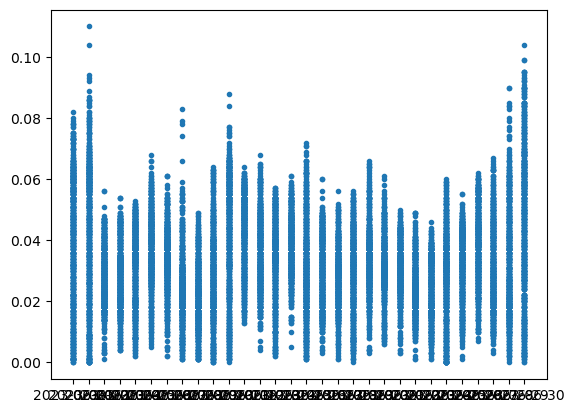

In [16]:
plt.plot(ozone['date_local'], ozone['sample_measurement'], '.')

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Spatiotemporal Issues Abound!</p>
    It looks like the primary hiccups in trying to plot these data are the fact that the DataFrame has a separate column for date and time, and that there are multiple sample sites across the DataFrame.

<p></p>We can combine the dates and times into a single datetime value.<p>
    
We can also specify the sample sites we want to look at, or take averages across a county or the whole state.<p>Either way, we'll need to prepare the data.</p>
</div>

---

## Preparing the data for visualization

Let's utilize some Pandas features to generate a more manageable DataFrame for plotting.

##### First, let's select only one specific county--Albany

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Not every county samples every type of pollutant!
</div>


In [17]:
O3alb = ozone.loc[ozone['county'] == 'Albany', ['date_local', 'time_local', 'sample_measurement', 'units_of_measure', 'site_number', 'latitude', 'longitude']]

In [18]:
O3alb

date_local time_local  sample_measurement   units_of_measure  \
16803  2023-06-01      00:00               0.047  Parts per million   
16804  2023-06-01      01:00               0.046  Parts per million   
16805  2023-06-01      02:00               0.043  Parts per million   
16806  2023-06-01      03:00               0.042  Parts per million   
16807  2023-06-01      04:00               0.038  Parts per million   
...           ...        ...                 ...                ...   
18928  2023-06-30      19:00               0.059  Parts per million   
18929  2023-06-30      20:00               0.057  Parts per million   
18930  2023-06-30      21:00               0.058  Parts per million   
18931  2023-06-30      22:00               0.059  Parts per million   
18932  2023-06-30      23:00               0.065  Parts per million   

      site_number  latitude  longitude  
16803        0012  42.68075  -73.75733  
16804        0012  42.68075  -73.75733  
16805        0012  42.68075  -73.75733  
16806        0012  42.68075  -73.75733  
16807        0012  42.68075  -73.75733  
...           ...       ...        ...  
18928        0012  42.68075  -73.75733  
18929        0012  42.68075  -73.75733  
18930        0012  42.68075  -73.75733  
18931        0012  42.68075  -73.75733  
18932        0012  42.68075  -73.75733  

[720 rows x 7 columns]

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
Something is a bit off, here. We see that the datetimes are mostly, but not entirely in order.

<b>OR...</b> you see that there is no data at all. This is the result of data being sporatic over space and time.
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Team Question</p>
 
<b>Perhaps this notebook should choose a specific time that we know there is data in, at least after showing that this problem might arise?</b></div>

Let's make sure our new DataFrame for Albany is properly chronological.

In [19]:
O3alb['datetime'] = pd.to_datetime(O3alb['date_local'] + ' ' + O3alb['time_local'])
O3alb = O3alb.sort_values(by='datetime')

In [20]:
O3alb

date_local time_local  sample_measurement   units_of_measure  \
16803  2023-06-01      00:00               0.047  Parts per million   
16804  2023-06-01      01:00               0.046  Parts per million   
16805  2023-06-01      02:00               0.043  Parts per million   
16806  2023-06-01      03:00               0.042  Parts per million   
16807  2023-06-01      04:00               0.038  Parts per million   
...           ...        ...                 ...                ...   
18928  2023-06-30      19:00               0.059  Parts per million   
18929  2023-06-30      20:00               0.057  Parts per million   
18930  2023-06-30      21:00               0.058  Parts per million   
18931  2023-06-30      22:00               0.059  Parts per million   
18932  2023-06-30      23:00               0.065  Parts per million   

      site_number  latitude  longitude            datetime  
16803        0012  42.68075  -73.75733 2023-06-01 00:00:00  
16804        0012  42.68075  -73.75733 2023-06-01 01:00:00  
16805        0012  42.68075  -73.75733 2023-06-01 02:00:00  
16806        0012  42.68075  -73.75733 2023-06-01 03:00:00  
16807        0012  42.68075  -73.75733 2023-06-01 04:00:00  
...           ...       ...        ...                 ...  
18928        0012  42.68075  -73.75733 2023-06-30 19:00:00  
18929        0012  42.68075  -73.75733 2023-06-30 20:00:00  
18930        0012  42.68075  -73.75733 2023-06-30 21:00:00  
18931        0012  42.68075  -73.75733 2023-06-30 22:00:00  
18932        0012  42.68075  -73.75733 2023-06-30 23:00:00  

[720 rows x 8 columns]

Now we should be able to plot a basic ozone time series for Albany, NY that covers this month for last year.

---

## Generating a time series plot

Let's quickly test a lineplot of our data using seaborn.

<Axes: xlabel='datetime', ylabel='sample_measurement'>

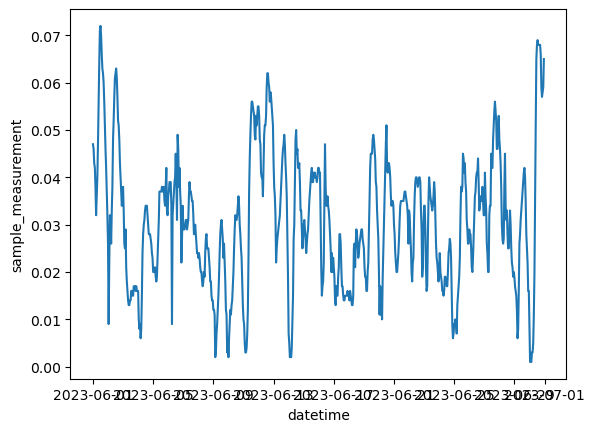

In [21]:
sns.lineplot(x="datetime", y="sample_measurement", data=O3alb)

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We have a time series! Now let's polish it up a bit...
</div>

2023-06-01 00:00:00
2023-06-30 23:00:00


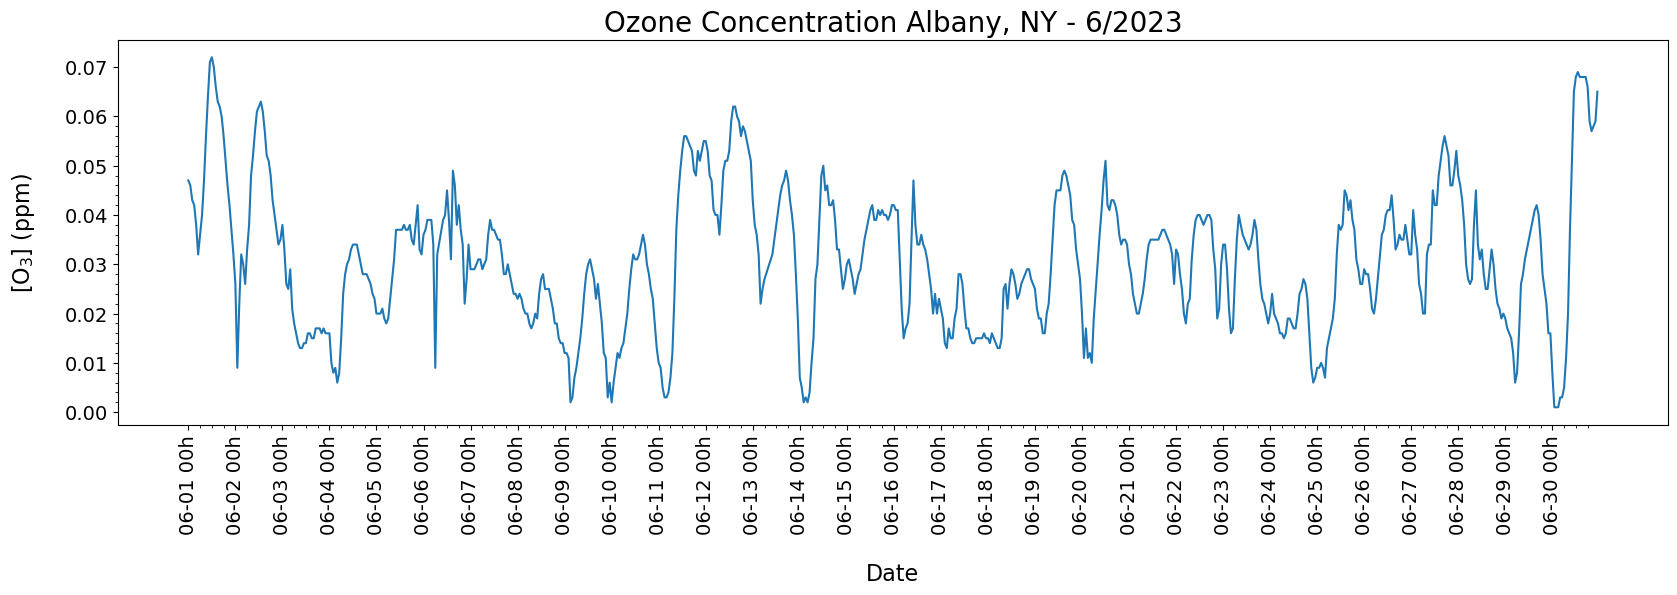

In [22]:
# Design the figure:

# Figure shape
fig, ax = plt.subplots(figsize = (20,5))

# Give it a title
plt.title((f'Ozone Concentration Albany, NY - {month}/{year-1}'), fontsize = 20)

# Plot the data
sns.lineplot(x="datetime", y="sample_measurement", data=O3alb, ax=ax)

# Title the axes
ax.set_xlabel('Date', labelpad = 20, fontsize = 16)
ax.set_ylabel('[O$_{3}$] (ppm)', labelpad = 20, fontsize = 16)

    # For the X-Axis

# Set major x-ticks for midnight (00h)
x_major = O3alb['datetime'][O3alb['datetime'].dt.hour == 0]
ax.set_xticks(x_major)
print(O3alb['datetime'].min())
print(O3alb['datetime'].max())
# Set minor ticks at every 6 hours
x_minor = pd.date_range(start= O3alb['datetime'].min(), end= O3alb['datetime'].max(), freq='6h')
ax.set_xticks(x_minor, minor=True)

# Clean up the date label so it doesn't show the year or minutes
formatted_labels = [x.strftime('%m-%d %H') + 'h' for x in x_major]
ax.set_xticklabels(formatted_labels, rotation=90, fontsize = 14)

    # For the Y-Axis

# Add minor ticks to the y-axis
y_minor = np.arange(0, 0.06, 0.002)
ax.set_yticks(y_minor, minor = True)

# Fix the fontsize for the y-tick labels
ax.tick_params(axis='y', labelsize=14)

plt.show()

We can also add a new data points to compare (e.g., NO<sub>2</sub>)

In [23]:
NO2_data = aqs.bystate.sampledata(parameter= NO2, bdate = date(year=year-1, month=month, day = start), edate = date(year=year-1, month=month, day = end), stateFIPS=NY)

In [24]:
NO2_data['county'].unique()

array(['Queens', 'Suffolk', 'Bronx', 'Erie', 'Monroe'], dtype=object)

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">ALBANY?!</p>
    Albany doesn't seem to display data for NO<sub>2</sub>.<p>
    You're welcome to check on your own for another pollutant to compare, but we'll shift to another county that covers both O<sub>3</sub> and NO<sub>2</sub>.
</div>

In [25]:
ozone['county'].unique()

array(['Erie', 'Saratoga', 'Chautauqua', 'Bronx', 'New York', 'Monroe',
       'Onondaga', 'Niagara', 'Richmond', 'Essex', 'Steuben', 'Dutchess',
       'Suffolk', 'Westchester', 'Oswego', 'Wayne', 'Rockland', 'Queens',
       'Hamilton', 'Putnam', 'Albany', 'Tompkins', 'Jefferson'],
      dtype=object)

The Bronx seems like a good county to work with for the purposes of this Notebook.

In [26]:
bronxNO2 = NO2_data.loc[NO2_data['county'] == 'Bronx', ['date_local', 'time_local', 'sample_measurement', 'units_of_measure', 'site_number', 'latitude', 'longitude']]
bronxO3 = ozone.loc[ozone['county'] == 'Bronx', ['date_local', 'time_local', 'sample_measurement', 'units_of_measure', 'site_number', 'latitude', 'longitude']]

In [36]:
print('O3: ', bronxO3.iloc[0,:], '\n')
print('NO2: ', bronxNO2.iloc[0,:])

O3:  date_local                     2023-06-01
time_local                          00:00
sample_measurement                  0.001
units_of_measure        Parts per million
site_number                          0133
latitude                          40.8679
longitude                       -73.87809
datetime              2023-06-01 00:00:00
Name: 195, dtype: object 

NO2:  date_local                     2023-06-01
time_local                          00:00
sample_measurement                   35.4
units_of_measure        Parts per billion
site_number                          0133
latitude                          40.8679
longitude                       -73.87809
datetime              2023-06-01 00:00:00
Name: 159, dtype: object


We've seen that both data are present for Bronx County.

Again, let's make sure our new DataFrames are properly chronological.

In [28]:
bronxO3['datetime'] = pd.to_datetime(bronxO3['date_local'] + ' ' + bronxO3['time_local'])
bronxO3 = bronxO3.sort_values(by='datetime')

bronxNO2['datetime'] = pd.to_datetime(bronxNO2['date_local'] + ' ' + bronxNO2['time_local'])
bronxNO2 = bronxNO2.sort_values(by='datetime')


### Now we'll plot both data together.

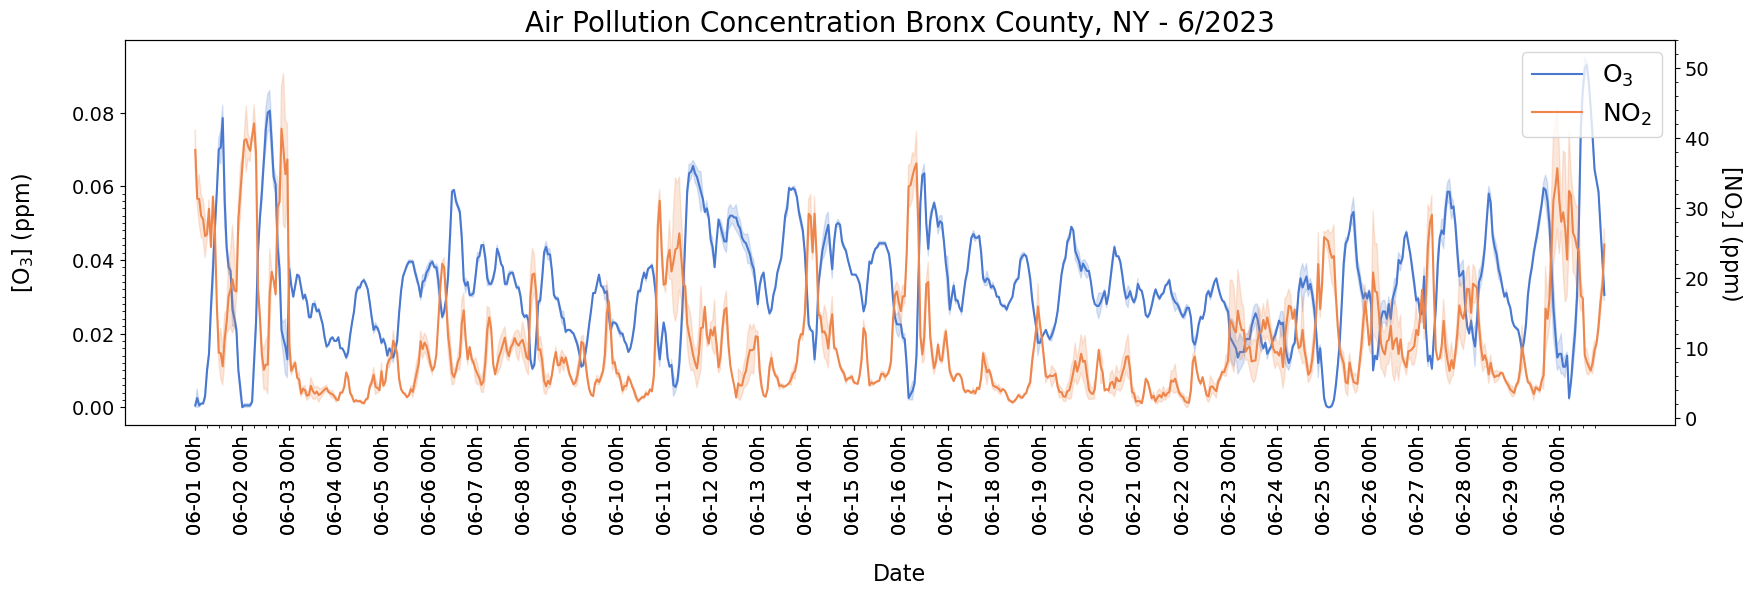

In [29]:
# Design the figure:   
fig, ax = plt.subplots(figsize = (20,5))

shared_colors = sns.color_palette('muted')

# Create a secondary y-axis
ax2 = ax.twinx()

# Give it a title
plt.title((f'Air Pollution Concentration Bronx County, NY - {month}/{year-1}'), fontsize = 20)

# Plot the data for O3
sns.lineplot(x="datetime", y="sample_measurement", data=bronxO3, label = 'O$_{3}$', ax = ax, legend = False, color= shared_colors[0],)

# Plot NO2 data alongside O3 data
sns.lineplot(x="datetime", y="sample_measurement", data=bronxNO2, label='NO$_{2}$', ax = ax2, legend = False, color= shared_colors[1],)


    # For the X-Axis:

# Title the x-axis
ax.set_xlabel('Date', labelpad = 20, fontsize = 16)

# Set major x-ticks for midnight (00h)
x_major = bronxO3['datetime'][bronxO3['datetime'].dt.hour == 0]
ax.set_xticks(x_major)

# Set minor ticks at every 6 hours
x_minor = pd.date_range(start= bronxO3['datetime'].min(), end= bronxO3['datetime'].max(), freq='6h')
ax.set_xticks(x_minor, minor=True)

# Clean up the date label so it doesn't show the year or minutes
formatted_labels = [x.strftime('%m-%d %H') + 'h' for x in x_major]
ax.set_xticklabels(formatted_labels, rotation=90, fontsize = 14)

    # For the Y-Axes:

# Add titles to both y-axes
ax.set_ylabel('[O$_{3}$] (ppm)', labelpad = 25, fontsize = 16)
ax2.set_ylabel('[NO$_{2}$] (ppm)', labelpad=25, fontsize=16, rotation = -90)

# Add minor ticks to the y-axis for O3
y_minor = np.arange(0, 0.06, 0.002)
ax.set_yticks(y_minor, minor = True)

# Fix the fontsize for the y-tick labels
ax.tick_params(axis='y', labelsize=14)

# Add minor ticks to the secondary y-axis for NO2
y2_minor = np.arange(0, 55, 2)
ax2.set_yticks(y2_minor, minor=True)

# Match fontsize for secondary y-axis
ax2.tick_params(axis='y', labelsize=14)

    # Design the legend:

# Combine both plot labels into a single legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

plt.legend(handles + handles2, labels + labels2, loc='best', fontsize=18)


plt.show()

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We've been able to pull data from the AQS and plot a time series!
</div>

---

### Let's take a quick look at how you can pull data based on a areal extent, and then we'll close out this notebook.

#### Let's start with the CONUS

In [30]:
lonW = '-130'
lonE = '-62'
latS = '20'
latN = '55'

In [31]:
CONUS = aqs.bybox.sampledata(parameter= O3, bdate = date(year=year-1, month=month, day = day-1), 
                           edate = date(year=year-1, month=month, day = day), 
                           minlat = latS, maxlat = latN, minlon = lonW, maxlon = lonE)
CONUS

state_code county_code site_number parameter_code  poc   latitude  \
0             08         005        0002          44201    1  39.567887   
1             08         005        0002          44201    1  39.567887   
2             08         005        0002          44201    1  39.567887   
3             08         005        0002          44201    1  39.567887   
4             08         005        0002          44201    1  39.567887   
...          ...         ...         ...            ...  ...        ...   
60041         06         089        0009          44201    1  40.689253   
60042         06         089        0009          44201    1  40.689253   
60043         06         089        0009          44201    1  40.689253   
60044         06         089        0009          44201    1  40.689253   
60045         06         089        0009          44201    1  40.689253   

        longitude  datum parameter  date_local  ... detection_limit  \
0     -104.957193  WGS84     Ozone  2023-06-19  ...          0.0050   
1     -104.957193  WGS84     Ozone  2023-06-19  ...          0.0050   
2     -104.957193  WGS84     Ozone  2023-06-19  ...          0.0050   
3     -104.957193  WGS84     Ozone  2023-06-19  ...          0.0050   
4     -104.957193  WGS84     Ozone  2023-06-19  ...          0.0050   
...           ...    ...       ...         ...  ...             ...   
60041 -122.402194  WGS84     Ozone  2023-06-20  ...          0.0006   
60042 -122.402194  WGS84     Ozone  2023-06-20  ...          0.0006   
60043 -122.402194  WGS84     Ozone  2023-06-20  ...          0.0006   
60044 -122.402194  WGS84     Ozone  2023-06-20  ...          0.0006   
60045 -122.402194  WGS84     Ozone  2023-06-20  ...          0.0006   

      uncertainty qualifier  method_type  \
0            None      None          FEM   
1            None      None          FEM   
2            None      None          FEM   
3            None      None          FEM   
4            None      None          FEM   
...           ...       ...          ...   
60041        None      None          FEM   
60042        None      None          FEM   
60043        None      None          FEM   
60044        None      None          FEM   
60045        None      None          FEM   

                                                  method method_code  \
0                 INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087   
1                 INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087   
2                 INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087   
3                 INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087   
4                 INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087   
...                                                  ...         ...   
60041  Instrumental - Chemiluminescence API Model 265...         199   
60042  Instrumental - Chemiluminescence API Model 265...         199   
60043  Instrumental - Chemiluminescence API Model 265...         199   
60044  Instrumental - Chemiluminescence API Model 265...         199   
60045  Instrumental - Chemiluminescence API Model 265...         199   

            state    county date_of_last_change  cbsa_code  
0        Colorado  Arapahoe          2024-01-09      19740  
1        Colorado  Arapahoe          2024-01-09      19740  
2        Colorado  Arapahoe          2024-01-09      19740  
3        Colorado  Arapahoe          2024-01-09      19740  
4        Colorado  Arapahoe          2024-01-09      19740  
...           ...       ...                 ...        ...  
60041  California    Shasta          2024-03-25      39820  
60042  California    Shasta          2024-03-25      39820  
60043  California    Shasta          2024-03-25      39820  
60044  California    Shasta          2024-03-25      39820  
60045  California    Shasta          2024-03-25      39820  

[60046 rows x 29 columns]

#### We can also use the extent parameters for New York State.

In [32]:
NY_E = -71
NY_W = -81.0
NY_N = 46
NY_S = 40

In [33]:
NYS = aqs.bybox.sampledata(parameter= O3, bdate = date(year=year-1, month=month, day = day-1), 
                           edate = date(year=year-1, month=month, day = day), 
                           minlat = NY_S, maxlat = NY_N, minlon = NY_W, maxlon = NY_E)
NYS

state_code county_code site_number parameter_code  poc   latitude  \
0            42         125        5001          44201    1  40.445278   
1            42         125        5001          44201    1  40.445278   
2            42         125        5001          44201    1  40.445278   
3            42         125        5001          44201    1  40.445278   
4            42         125        5001          44201    1  40.445278   
...         ...         ...         ...            ...  ...        ...   
6137         42         007        0008          44201    1  40.691857   
6138         42         007        0008          44201    1  40.691857   
6139         42         007        0008          44201    1  40.691857   
6140         42         007        0008          44201    1  40.691857   
6141         42         007        0008          44201    1  40.691857   

      longitude  datum parameter  date_local  ... detection_limit uncertainty  \
0    -80.420833  WGS84     Ozone  2023-06-19  ...           0.005        None   
1    -80.420833  WGS84     Ozone  2023-06-19  ...           0.005        None   
2    -80.420833  WGS84     Ozone  2023-06-19  ...           0.005        None   
3    -80.420833  WGS84     Ozone  2023-06-19  ...           0.005        None   
4    -80.420833  WGS84     Ozone  2023-06-19  ...           0.005        None   
...         ...    ...       ...         ...  ...             ...         ...   
6137 -80.299211  WGS84     Ozone  2023-06-20  ...           0.005        None   
6138 -80.299211  WGS84     Ozone  2023-06-20  ...           0.005        None   
6139 -80.299211  WGS84     Ozone  2023-06-20  ...           0.005        None   
6140 -80.299211  WGS84     Ozone  2023-06-20  ...           0.005        None   
6141 -80.299211  WGS84     Ozone  2023-06-20  ...           0.005        None   

                qualifier  method_type  \
0     AV - Power Failure.          FEM   
1     AV - Power Failure.          FEM   
2     AV - Power Failure.          FEM   
3     AV - Power Failure.          FEM   
4     AV - Power Failure.          FEM   
...                   ...          ...   
6137                 None          FEM   
6138                 None          FEM   
6139                 None          FEM   
6140                 None          FEM   
6141                 None          FEM   

                                      method method_code         state  \
0     INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
1     INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
2     INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
3     INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
4     INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
...                                      ...         ...           ...   
6137  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
6138  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
6139  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
6140  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   
6141  INSTRUMENTAL - ULTRA VIOLET ABSORPTION         087  Pennsylvania   

          county date_of_last_change  cbsa_code  
0     Washington          2023-09-14      38300  
1     Washington          2023-09-14      38300  
2     Washington          2023-09-14      38300  
3     Washington          2023-09-14      38300  
4     Washington          2023-09-14      38300  
...          ...                 ...        ...  
6137      Beaver          2023-09-14      38300  
6138      Beaver          2023-09-14      38300  
6139      Beaver          2023-09-14      38300  
6140      Beaver          2023-09-14      38300  
6141      Beaver          2023-09-14      38300  

[6142 rows x 29 columns]

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We've successfully fetched data from the AQS by areal extent for both the CONUS and for NYS!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">NOTE</p>
    If you want to only use data for within the state, be sure to filter the new DataFrame to ommit data points from other states that cross into the boundaries of your areal extent.
</div>

---

## Summary
In this notebook, we've 
- managed to access air pollution data from the EPA's AQS
- looked at different ways to fetch the data
- looked at different types of data available
- prepared the data for plotting
- generated time series plots of air pollution data
- <b>(... include plotting over a map, direct user to other cookbooks for ideas on interactive visuals?)</b>

<b>You are encouraged to explore other variables within the dataset, and to utilize pandas and numpy functions to look at ways to manipulate and analyze these data!</b>

## Resources and references

Documentation for pyaqsapi: https://usepa.github.io/pyaqsapi/pyaqsapi.html

More information about the pyaqsapi package (developed by [Clinton McCrowey, EPA Region 3](https://github.com/mccroweyclinton-EPA)) can be found on GitHub: https://github.com/USEPA/pyaqsapi

The EPA's AQS has general information and documentation here: https://www.epa.gov/aqs

Details about the specific parameter codes can be found here: https://aqs.epa.gov/aqsweb/documents/codetables/parameters.html

To access real-time data for air pollution, the [AirNow API](https://docs.airnowapi.org/) can be utilized.

Thanks to Daniel Garver (EPA Region 4) for help locating the AQS API, and for directing the authors of this Cookbook to the appropriate resources.

---

##### Information about the author: [Adam Deitsch](https://amdeitsch.github.io/)
